# **EE488 Machine Learning basics and practice**
## **Mini-Assignment 1**

## Objective
* part 1. Data Preparation
* part 2. Logistic Regression

## **Part1** Data Preparation
* This part is for downloading the dataset to be used in this project. 
* All the related codes are basically provided below.

### Step1. Download and decompress the MNIST dataset (4, 9 classes)

In [ ]:
#Setting
from __future__ import division, print_function
import numpy as np
import os 
import pickle
import matplotlib.pyplot as plt

from urllib import request
from tqdm import tqdm

In [ ]:
# {4, 9} class mnist dataset download and decompress
!pip install gdown
!gdown --id 1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
!tar -xvf mnist_49.tar
!rm -f mnist_49.tar

# Dataset Load
X_train = np.load('mnist_49/X_train.npy')
X_test = np.load('mnist_49/X_test.npy')
Y_train = np.load('mnist_49/Y_train.npy')
Y_test = np.load('mnist_49/Y_test.npy')

Downloading...
From: https://drive.google.com/uc?id=1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
To: /content/mnist_49.tar
10.9MB [00:00, 94.2MB/s]
mnist_49/
mnist_49/X_train.npy
mnist_49/X_test.npy
mnist_49/Y_test.npy
mnist_49/Y_train.npy
mnist_49/MNIST Copyright.txt


In [ ]:
# Reshape the training and test examples
# Data from Part 1 - Step 1
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

print('X_train_flatten shape: ' + str(X_train_flatten.shape))
print('Y_train shape: ' + str(Y_train.shape))
print('X_test_flatten shape: ' + str(X_test_flatten.shape))
print('Y_test shape: ' + str(Y_test.shape))

X_train_std = X_train_flatten / 255.
X_test_std = X_test_flatten / 255.

X_train_flatten shape: (11791, 784)
Y_train shape: (11791,)
X_test_flatten shape: (1991, 784)
Y_test shape: (1991,)


### Step2. Download and define a function for preparing the CIFAR10 dataset
If you put the classes you want to use in the form of a list (ex, [0, 1], [3, 5, 8], etc.) as an argument to the *'cifar10_subset'* function, then, this function returns training data/label and test data/label of classes.

In [ ]:
#Download CIFAR10 Dataset
request.urlretrieve('https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz', 'cifar-10-python.tar.gz')
!tar -xzf cifar-10-python.tar.gz

In [ ]:
for i in range(1,6):
    filename='data_batch_%d'%i
    with open('cifar-10-batches-py/'+filename, 'rb') as fo:
        dict_data = pickle.load(fo, encoding='bytes')
  
    images_batch = dict_data[b'data']
    labels_batch = dict_data[b'labels']
    if i==1:
        train_images = images_batch
        train_labels = labels_batch
    else:
        train_images = np.concatenate((train_images, images_batch), axis=0)
        train_labels.extend(labels_batch)
        
with open('cifar-10-batches-py/test_batch', 'rb') as fo:
    dict_data = pickle.load(fo, encoding='bytes')

test_images = dict_data[b'data']
test_labels = dict_data[b'labels']

In [ ]:
train_indexes = sorted(range(len(train_labels)), key=lambda k: train_labels[k])
test_indexes = sorted(range(len(test_labels)), key=lambda k: test_labels[k])

In [ ]:
def cifar10_subset(class_ind=[0,1]):
    assert (len(class_ind) >=2 and len(class_ind) <=10)
    assert (min(class_ind) >=0 and max(class_ind) <=9)
    train_images_cl = []
    train_labels_cl = []
    test_images_cl = []
    test_labels_cl = []
    for i in class_ind:
        train_inds = train_indexes[i*5000:(i+1)*5000]
        test_inds = test_indexes[i*1000:(i+1)*1000]
        train_images_tmp = train_images[train_inds,:]
        train_labels_tmp = np.array(train_labels)[train_inds]
        test_images_tmp = test_images[test_inds,:]
        test_labels_tmp = np.array(test_labels)[test_inds]

        train_images_cl.append(train_images_tmp)
        train_labels_cl.append(train_labels_tmp)
        test_images_cl.append(test_images_tmp)
        test_labels_cl.append(test_labels_tmp)
  
    return np.array(train_images_cl), np.array(train_labels_cl), np.array(test_images_cl), np.array(test_labels_cl)

## **Part2** Logistic Regression
* Understand and Implement Logistic Regression using numpy library.
* Apply your own classifier implemented by numpy to MNIST and CIFAR10 dataset.

### Step1. Implement Logistic Regression using Numpy

## **TODO** : Fill in the blank with the code by referring to the following formulas below for all the **steps 1-1 ~ 1-6.** You should write your own **description of your source code** in the report.

#### step 1-1. Implement Sigmoid Function

**Sigmoid:** $f(z) = \dfrac{1}{1+e^{-z}}$ where $z=w^T x$

In [ ]:
def sigmoid(z):
    ######################## Blank ########################
    
    #######################################################
    return sig

#### step 1-2. Implement forward propagation

__x__: Input data of size (sample_size, feature_size)

__y__: target (labels)

__w__: model weights

__predict__: prediction for each data point $x_i$; $h(w^Tx_i)=\dfrac{1}{1+e^{-w^T x_i}}$ 

__loss__: $J(w)=\frac{1}{n}\sum_{i=1}^n[-y_i\text{log}\{h(w^Tx_i)\} - (1-y_i)\text{log}\{1-h(w^Tx_i)\}]$

where $n$ is number of samples and $y$ is target.

**NOTE**: If you use ```np.log``` method, it is recommended to use as follows,

```python
np.log(x) -> np.log(x + eps)
```
where ```eps``` is small positive number used to avoid taking of almost zero value.

In [ ]:
# Print out the result of sigmoid function 

print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(4.5) = " + str(sigmoid(4.5)))
print ("sigmoid(-6) = " + str(sigmoid(-6)))

sigmoid(0) = 0.5
sigmoid(4.5) = 0.9890130573694068
sigmoid(-6) = 0.0024726231566347743


In [ ]:
def forward(x, y, w, eps=1e-8):
    ######################## Blank ########################
    
    #######################################################
    return predict, loss

#### step 1-3. Implement backward propagation

__Hint:__ Refer to the following derivation.

$$
\begin{aligned}
\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} &=-\frac{1}{n} \sum_{i=1}^{n}\left[y_{i}\left(1-h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)\right)-\left(1-y_{i}\right) h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)\right] \boldsymbol{x}_{i} \\
&=\frac{1}{n} \sum_{i=1}^{n}\left[h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)-y_{i}\right] \boldsymbol{x}_{i}\\
&= \frac{1}{n} (\hat{Y}-Y)X
\end{aligned}
$$

__grad_w__: Gradient of weights

In [ ]:
def backward(x, y, predict):
    ######################## Blank ########################
    
    #######################################################
    return grad_w

#### step 1-4. Add bias unit

To implement the bias unit, insert ones column vertor into dataset $x$; Define $\bar{x}$ and $\bar{w}$ as follows:

$$
\bar{x}:=\left[\begin{array}{cc}
x_{1}^{T} & 1 \\
x_{2}^{T} & 1 \\
\vdots & \\
x_{n}^{T} & 1
\end{array}\right] \in \mathbf{R}^{n \times(d+1)}, \bar{w}:=\left[\begin{array}{c}
w \\
b
\end{array}\right] \in \mathbf{R}^{d+1}
$$

Argument __b__ of ```bias_unit``` function below refers to the bias term.

__x_bar__: $\bar{x}$

__w_bar__: $\bar{w}$

In [ ]:
def bias_unit(x, w, b):
    ######################## Blank ########################
    
    #######################################################
    return x_bar, w_bar

#### step 1-5. Model initialization

Initialize the model(__w__ and __b__) with arbitrary(e.g. Guassian distribution) values.

* Initialize __w__ with gaussian distribution (use np.random.normal)
* Initialize __b__ with zero

In [ ]:
def initialize_params(X_train, verbose=False):
    
    ######################## Blank ########################
    
    #######################################################
    
    X_train_bar, w_bar = bias_unit(X_train, w, b) # add bias unit  
    if verbose:
        print('Before adding the bias unit')
        print('shape of X_train:, ', X_train.shape)
        print('w: ', w.__repr__())
        print('b: ', b.__repr__(), end='\n\n')
        print('After adding the bias unit')
        print('shape of X_train_bar:, ', X_train_bar.shape)
        print('w_bar: ', w_bar.__repr__())
    
    return X_train_bar, w_bar

#### step 1-6. Implement ```accuracy``` function  for computing the accuracy

Implement a function that return accuracy when ```predict``` $h(w^Tx_i)=\frac{1}
{1+e^{-w^T x_i}}$ and ```y``` are given.

__acc__: $\dfrac{1}{n}\sum_{i=1}^{n}\mathbf{1}_{[\hat{y}_i=y_i]} \times 100 (\%)$ where $\hat{y}_i = \mathbf{1}_{[h(w^Tx_i)\geq0.5]}$. And $\mathbf{1}_{A}$ is defined as:

$$\mathbf{1}_{A}:=\left\{\begin{array}{ll}
1 & \text { if } A \text{ is true}\\
0 & \text { if } A \text{ is false}
\end{array}\right.$$

In [ ]:
def accuracy(predict, y):
    ######################## Blank ########################
    
    #######################################################
    return acc

### Step 2 Apply to the MNIST Dataset  

#### step 2-1 Implement training code combining all the methods above

## **TODO**: Fill in the blank using all the functions above and **attach the result** in your report.

In [ ]:
# hyperparameter
num_of_iteration = 5000
learning_rate = 0.5

# fix random seed for reproducibility
np.random.seed(100)

# Model initialization and add bias unit
X_train_bar, w_bar = initialize_params(X_train_std, False)

if w_bar.ndim != Y_train.ndim:  # if w is implemented as a column vector
    w_bar = w_bar.squeeze()
    
it = tqdm(range(num_of_iteration))
for i in it:
    
    ######################## Blank ########################
    
    #######################################################
    
    if i % 100 == 0:
        it.set_postfix(accuracy='{:.2f}'.format(train_acc),
                      loss='{:.4f}'.format(loss))
    
# compute the train & test accuracy
predict, _ = forward(X_train_bar, Y_train, w_bar)
train_acc = accuracy(predict, Y_train)
print('train accuracy: {:.2f}'.format(train_acc))

unit_ones = np.ones((len(X_test_std), 1))
X_test_bar = np.concatenate((X_test_std, unit_ones), axis=1)  # add bias unit for test dataset

predict, _ = forward(X_test_bar, Y_test, w_bar)
test_acc = accuracy(predict, Y_test)
print('test accuracy: {:.2f}'.format(test_acc))

100%|██████████| 5000/5000 [01:15<00:00, 66.45it/s, accuracy=97.30, loss=0.0774]

train accuracy: 97.32
test accuracy: 96.38


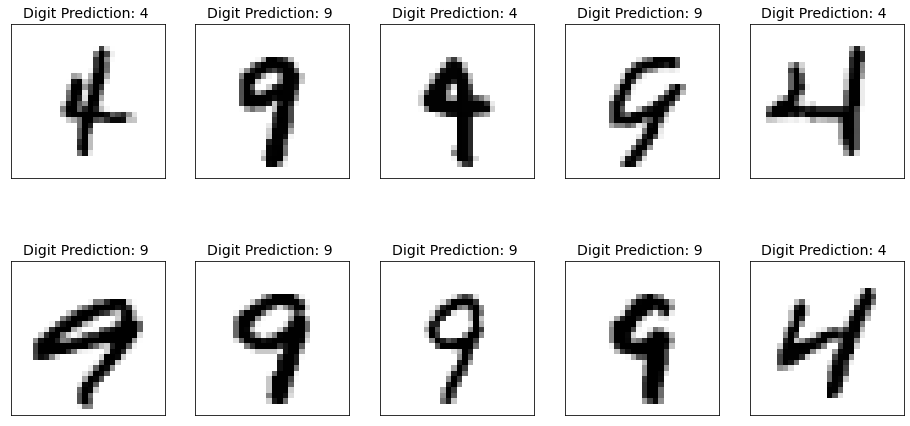

In [ ]:
# Prediction Results
np.random.seed(2020)
idxs = np.random.choice(len(Y_test), 10, replace=False)
label_to_class = {0: '4', 1: '9'}

plt.figure(figsize=(16, 8))
for i, idx in enumerate(idxs):
    plt.subplot(2, 5, i + 1)
    predict, _ = forward(X_test_bar, Y_test, w_bar)
    pred_label = (predict[idx] >= 0.5).astype(np.int)
    plt.imshow(X_test[idx], cmap='gray_r')
    plt.title('Digit Prediction: {} '.format(label_to_class[pred_label]), fontsize=14)
    plt.xticks([]); plt.yticks([])

### Step 3 Apply to the CIFAR10 dataset

#### step 3-1 Implement training code combining all the methods above

## **TODO**: Fill in the blank and **attach the result** in your report.

In [ ]:
X_train_flatten, Y_train, X_test_flatten, Y_test = cifar10_subset([0, 1])

X_train_flatten = X_train_flatten.reshape(2 * 5000, -1)
X_test_flatten = X_test_flatten.reshape(2 * 1000, -1)
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

X_train_std = X_train_flatten / 255.
X_test_std = X_test_flatten / 255.

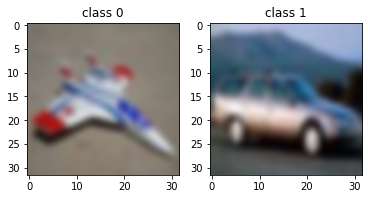

In [ ]:
#show image
import matplotlib.pyplot as plt

image1 = X_train_flatten[1].reshape(3,32,32).transpose([1,2,0])
image2 = X_train_flatten[5000].reshape(3,32,32).transpose([1,2,0])
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(image1,  interpolation="bicubic")
plt.title('class {}'.format(Y_train[0].astype(np.int)))
plt.subplot(122)
plt.imshow(image2,  interpolation="bicubic")
plt.title('class {}'.format(Y_train[5000].astype(np.int)))
plt.show()

In [ ]:
# hyperparameter
num_of_iteration = 5000
learning_rate = 0.1

# fix random seed for reproducibility
np.random.seed(100)

# Model initialization and add bias unit
X_train_bar, w_bar = initialize_params(X_train_std, False)

if w_bar.ndim != Y_train.ndim:  # if w is implemented as a column vector
    w_bar = w_bar.squeeze()
    
it = tqdm(range(num_of_iteration))
for i in it:
    
    ######################## Blank ########################
    
    #######################################################
    
    if i % 100 == 0:
        it.set_postfix(accuracy='{:.2f}'.format(train_acc),
                      loss='{:.4f}'.format(loss))
    
# compute the train & test accuracy
predict, _ = forward(X_train_bar, Y_train, w_bar)
train_acc = accuracy(predict, Y_train)
print('train accuracy: {:.2f}'.format(train_acc))

unit_ones = np.ones((len(X_test_std), 1))
X_test_bar = np.concatenate((X_test_std, unit_ones), axis=1)  # add bias unit for test dataset

predict, _ = forward(X_test_bar, Y_test, w_bar)
test_acc = accuracy(predict, Y_test)
print('test accuracy: {:.2f}'.format(test_acc))

100%|██████████| 5000/5000 [03:46<00:00, 22.10it/s, accuracy=74.10, loss=1.6515]

train accuracy: 74.22
test accuracy: 73.80


### Step 4 Implement Logistic Regression with L2 Regularization

## **TODO** : Fill in the blank with the code by referring to the following formulas below for all the **steps 4-1 ~ 4-2.** You should write your own **description of your source code** in the report.

#### step 4-1. Implement forward propagation with regularization term

__x__: Input data of size (sample_size, feature_size); $(x_1, y_1)$, $(x_2, y_2)$, ... $(x_n, y_n)$.

__y__: target (labels)

__w__: model weights

**lambda_**: regularization parameter

__predict__: Prediction for each data point $x_i$ : $h(w^Tx_i)=\dfrac{1}{1+e^{-w^T x_i}}$ 

__loss__: $J(w)=\frac{1}{n}\sum_{i=1}^n[-y_i\text{log}\{h(w^Tx_i)\} - (1-y_i)\text{log}\{1-h(w^Tx_i)\}] + \frac{\lambda}{2n}\Vert w\Vert^2_2$

where $n$ is number of samples and $y$ is target.

**Hint**: use ```numpy.linalg.norm``` method

In [ ]:
from numpy.linalg import norm

def forward_with_regularization(x, y, w, lambda_, eps=1e-8):
    ######################## Blank ########################
    
    #######################################################
    return predict, loss

#### step 4-2. Implement backward propagation

__Hint:__ Refer to the following derivation.

$$
\begin{aligned}
\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} &=-\frac{1}{n} \sum_{i=1}^{n}\left[y_{i}\left(1-h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)\right)-\left(1-y_{i}\right) h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)\right] \boldsymbol{x}_{i} + \frac{\lambda}{n}w \\
&=\frac{1}{n} \sum_{i=1}^{n}\left[h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)-y_{i}\right] \boldsymbol{x}_{i} + \frac{\lambda}{n}w\\
&= \frac{1}{n} (\hat{Y}-Y)X + \frac{\lambda}{n}w
\end{aligned}
$$

In [ ]:
def backward_with_regularization(x, y, w, predict, lambda_):
    ######################## Blank ########################
    
    #######################################################
    return grad_w

#### step 4-3. Training Regularized logistic regression with different $\lambda$ (Apply to the MNIST dataset)



Load the MNIST dataset again

In [ ]:
# Dataset Load
X_train = np.load('mnist_49/X_train.npy')
X_test = np.load('mnist_49/X_test.npy')
Y_train = np.load('mnist_49/Y_train.npy')
Y_test = np.load('mnist_49/Y_test.npy')

# Reshape the training and test examples
# Data from Part 1 - Step 1
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

X_train_std = X_train_flatten / 255.
X_test_std = X_test_flatten / 255.

## **TODO**: Fill in the blank and **attach the results and the figure** in your report.

In [ ]:
# hyperparameter
num_of_iteration = 5000
learning_rate = 0.5
lin_lambdas = np.linspace(-2, 3, 10)  
lambdas = np.power(np.e, lin_lambdas)  # Regularization parameter (lambda) = e^-2 ~ e^3

# fix random seed for reproducibility
np.random.seed(100)

# add bias unit for test dataset
unit_ones = np.ones((len(X_test_std), 1))
X_test_bar = np.concatenate((X_test_std, unit_ones), axis=1)  

train_accuracies = []
test_accuracies = []
    
for lambda_ in lambdas:

    # Model initialization and add bias unit
    X_train_bar, w_bar = initialize_params(X_train_std, False)

    if w_bar.ndim != Y_train.ndim:  # if w is implemented as a column vector
        w_bar = w_bar.squeeze()
    
    it = tqdm(range(num_of_iteration))
    for i in it:
        
        ######################## Blank ########################
        
        #######################################################

        if i % 100 == 0:
            it.set_postfix(accuracy='{:.2f}'.format(train_acc),
                          loss='{:.4f}'.format(loss))
    
    # compute the train & test accuracy
    predict, _ = forward(X_train_bar, Y_train, w_bar)
    train_acc = accuracy(predict, Y_train)
    print('train accuracy: {:.2f}'.format(train_acc))
    train_accuracies.append(train_acc)

    predict, _ = forward(X_test_bar, Y_test, w_bar)
    test_acc = accuracy(predict, Y_test)
    print('test accuracy: {:.2f}'.format(test_acc))
    test_accuracies.append(test_acc)
    
plt.plot(lin_lambdas, train_accuracies, label='train acc')
plt.plot(lin_lambdas, test_accuracies, label='test acc')
plt.xlabel('$\ln\lambda$')
plt.legend()
plt.show()